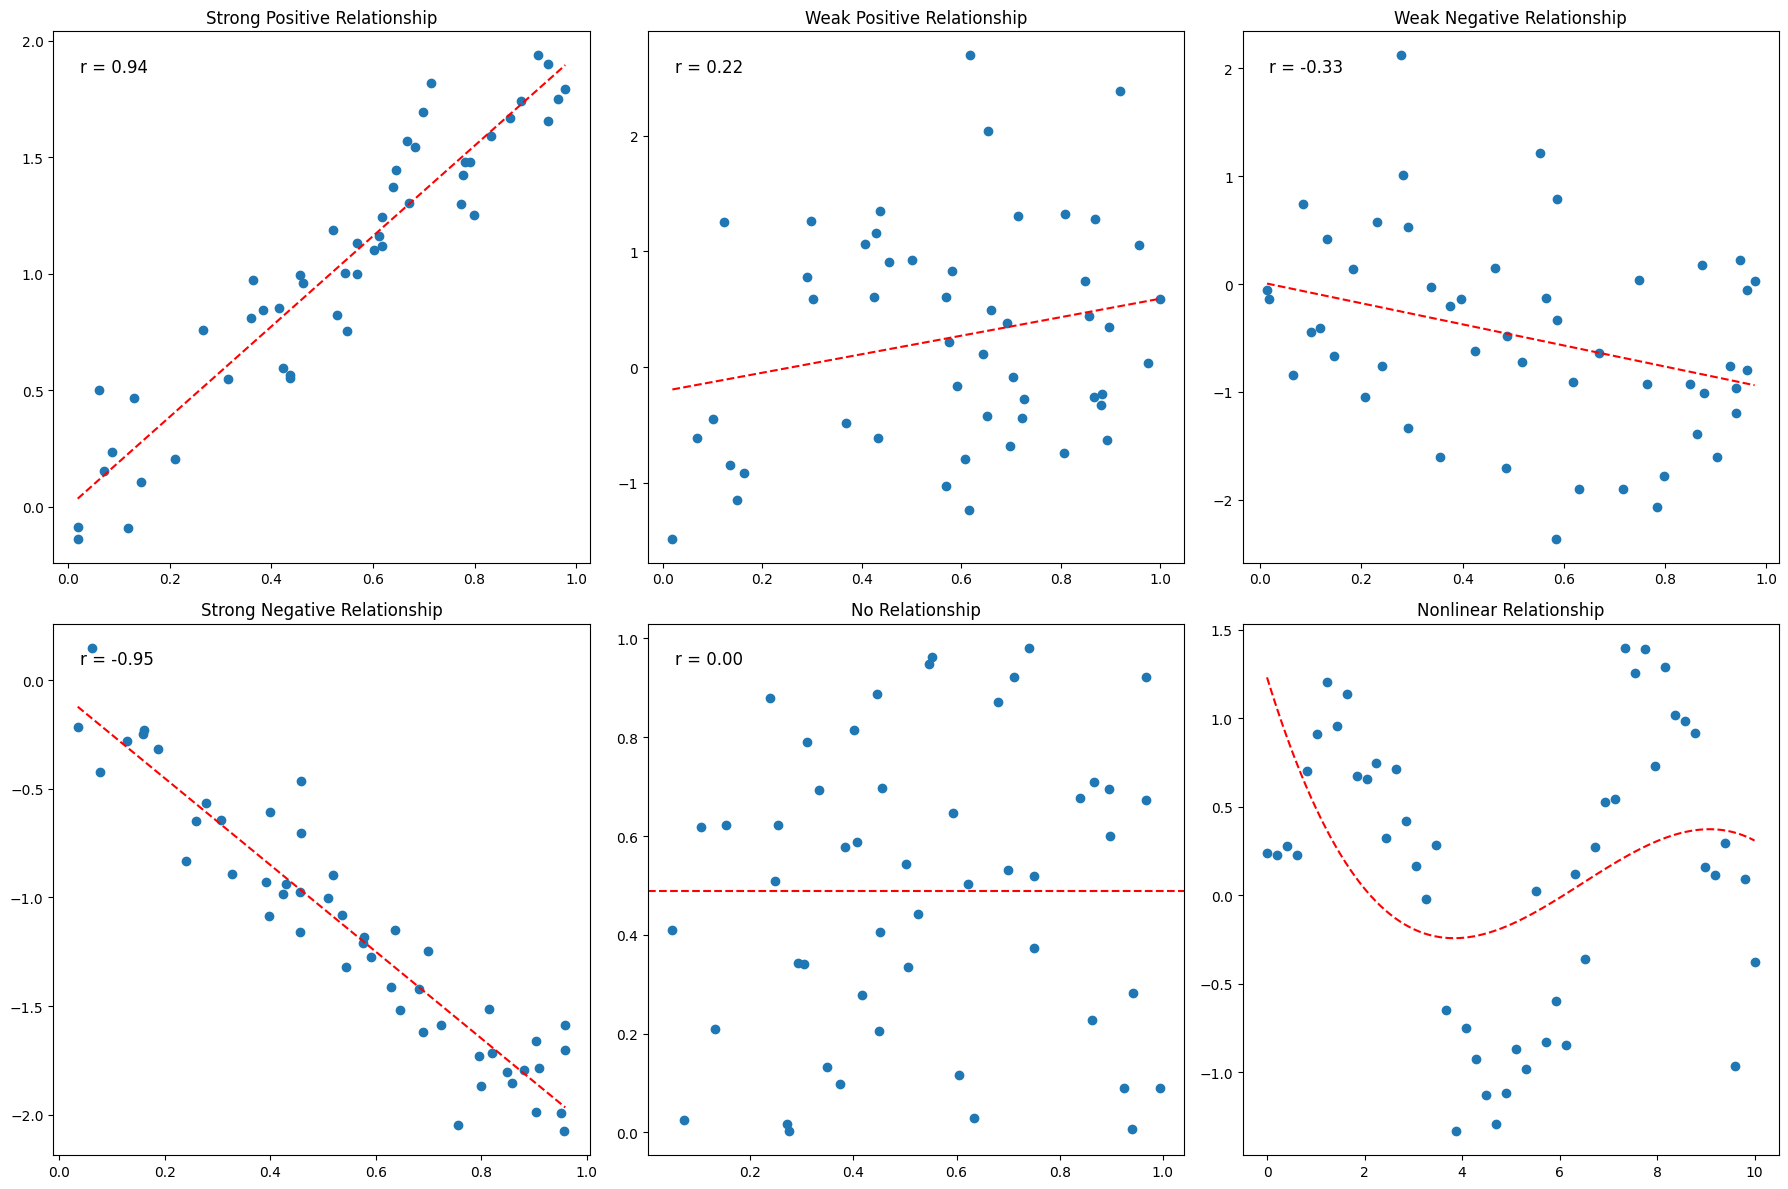

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.polynomial.polynomial import Polynomial
from scipy.stats import pearsonr


# Create a 2x3 grid of subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))


# Data for different relationships
np.random.seed(0)
n_samples = 50


# Helper function to plot linear regression line
def plot_linear_regression(ax, x, y):
   m, b = np.polyfit(x, y, 1)  # Fit linear regression (y = mx + b)
   x_vals = np.linspace(min(x), max(x), 100)
   ax.plot(x_vals, m * x_vals + b, color="red", linestyle="--")


# Helper function to display r-value
def display_r_value(ax, x, y, fixed_r=None):
   if fixed_r is not None:
       r = fixed_r
   else:
       r, _ = pearsonr(x, y)
   ax.text(0.05, 0.95, f'r = {r:.2f}', transform=ax.transAxes,
           fontsize=12, verticalalignment='top')


# Strong positive linear relationship
x1 = np.random.rand(n_samples)
y1 = 2 * x1 + np.random.normal(0, 0.2, n_samples)
axes[0, 0].scatter(x1, y1)
axes[0, 0].set_title('Strong Positive Relationship')
plot_linear_regression(axes[0, 0], x1, y1)
display_r_value(axes[0, 0], x1, y1)


# Weak positive linear relationship
x2 = np.random.rand(n_samples)
y2 = 0.5 * x2 + np.random.normal(0, 1, n_samples)
axes[0, 1].scatter(x2, y2)
axes[0, 1].set_title('Weak Positive Relationship')
plot_linear_regression(axes[0, 1], x2, y2)
display_r_value(axes[0, 1], x2, y2)


# Weak negative linear relationship
x3 = np.random.rand(n_samples)
y3 = -0.5 * x3 + np.random.normal(0, 1, n_samples)
axes[0, 2].scatter(x3, y3)
axes[0, 2].set_title('Weak Negative Relationship')
plot_linear_regression(axes[0, 2], x3, y3)
display_r_value(axes[0, 2], x3, y3)


# Strong negative linear relationship
x4 = np.random.rand(n_samples)
y4 = -2 * x4 + np.random.normal(0, 0.2, n_samples)
axes[1, 0].scatter(x4, y4)
axes[1, 0].set_title('Strong Negative Relationship')
plot_linear_regression(axes[1, 0], x4, y4)
display_r_value(axes[1, 0], x4, y4)


# No relationship (truly random)
x5 = np.random.rand(n_samples)
y5 = np.random.rand(n_samples)
axes[1, 1].scatter(x5, y5)
axes[1, 1].set_title('No Relationship')
axes[1, 1].axhline(y=np.mean(y5), color="red", linestyle="--")  # Horizontal line
display_r_value(axes[1, 1], x5, y5, fixed_r=0)  # Force r = 0


# Nonlinear relationship
x6 = np.linspace(0, 10, n_samples)
y6 = np.sin(x6) + np.random.normal(0, 0.3, n_samples)
axes[1, 2].scatter(x6, y6)
axes[1, 2].set_title('Nonlinear Relationship')


# Fit and plot a nonlinear regression (degree 3 polynomial)
p = Polynomial.fit(x6, y6, 3)  # Fit a cubic polynomial
x_vals = np.linspace(min(x6), max(x6), 100)
axes[1, 2].plot(x_vals, p(x_vals), color="red", linestyle="--")
# Do not display r-value for the nonlinear graph


# Adjust layout and display the plot
plt.tight_layout()
plt.show()